# Week 4 - DATA WRANGLING - 30.01

## Project Challenges: 30.01

Project Challenges

Unlike in the gapminder datasets the bike dataset has many values in the dataframe. Use pivot_table to create a pivot table of traffic density over weekdays and/or hours. Identify confounding factors in the dataset (e.g. workdays vs weekdays). Create a notebook with your solution.

In [299]:
bike_data = pd.read_csv('../data/bikes_clean.csv', parse_dates=True, index_col=0)
bike_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour_of_day,month,year,part_of_day
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,0,1,2011,morning
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,1,1,2011,morning
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2,1,2011,morning
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,3,1,2011,morning
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,4,1,2011,morning


In [300]:
#bike_data = pd.melt(bike_data,                                        # dataset
                        #id_vars=['season', 'temp', 'count', 'month'],      # Column(s) to use as identifier variables
                        #value_vars=['holiday', 'workinday', 'wather', 'atemp', 'humidity', 'casual', 'registered', 'hour_of_day', 'year', 'part_of_day'],  # Column(s) to unpivot
                        #var_name='bill_measurement',                     # Name to use for the ‘variable’ column
                        #value_name='value')   

In [301]:
#FOR PIVOT WE DON´T NEED A "ID" 

In [302]:
bike_data_pivot = pd.pivot(bike_data,
                           columns='month',
                           values= 'count')
bike_data_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 01:00:00,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 02:00:00,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 03:00:00,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 04:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.0
2012-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0
2012-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0


In [303]:
bike_data_pivot = pd.pivot(bike_data, 
                           values='count', 
                           columns='season')
bike_data_pivot

season,1,2,3,4
datetime,,,,
2011-01-01 00:00:00,16.0,NaN,NaN,NaN
2011-01-01 01:00:00,40.0,NaN,NaN,NaN
2011-01-01 02:00:00,32.0,NaN,NaN,NaN
2011-01-01 03:00:00,13.0,NaN,NaN,NaN
2011-01-01 04:00:00,1.0,NaN,NaN,NaN
...,...,...,...,...
2012-12-31 19:00:00,156.0,NaN,NaN,NaN
2012-12-31 20:00:00,104.0,NaN,NaN,NaN
2012-12-31 21:00:00,67.0,NaN,NaN,NaN


In [334]:
bike_data.pivot_table(values=['count', 'year', 'season'], 
                      columns='month', 
                      aggfunc='mean')


month,1,2,3,4,5,6,7,8,9,10,11,12
count,87.055983,113.305742,140.877800,186.999304,227.450941,251.742361,231.547715,222.332203,232.175365,225.635424,193.584551,143.405260
season,1.000000,1.000000,1.355737,2.000000,2.000000,2.333333,3.000000,3.000000,3.267223,4.000000,4.000000,2.942009
year,2011.518544,2011.516033,2011.504413,2011.499652,2011.500000,2011.500000,2011.500000,2011.504407,2011.501044,2011.487939,2011.499652,2011.500337


<AxesSubplot: xlabel='year', ylabel='count'>

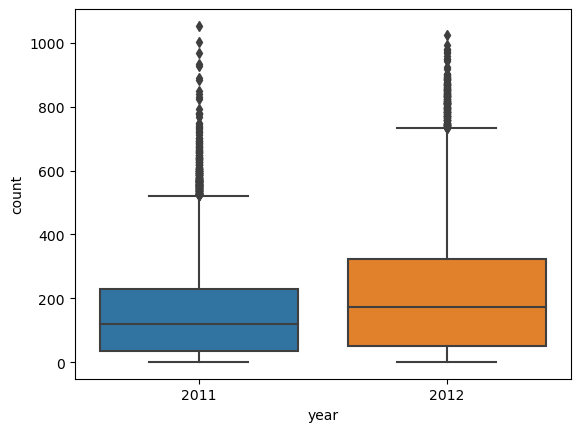

In [305]:
sns.boxplot(data=bike_data, x = 'year', y = 'count')

In [332]:
# pivot table primarily used to aggregate values into a table

bike_data.pivot_table(columns='year',
                values='count',
                aggfunc='mean')

year,2011,2012
count,158.209485,218.706091
